# MLProcessModelRepair

#### Instructions for Google Colab

Firstly, install the <code>pm4py</code> library.

In [ ]:
# Unzip data.zip
!pip install pm4py

Download and upload <a href="data.zip"><code>data.zip</code></a>.

Unzip <code>data.zip</code>

In [ ]:
!unzip data.zip

#### Results

Import packages

In [1]:
import os
import pm4py
import json
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.evaluation.replay_fitness import algorithm as fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

In [2]:
case_studies = {
    0: 'Purchasing',
    1: 'Purchasing_25',
    2: 'Purchasing_50',
    3: 'Purchasing',
    4: 'BPI12',
    5: 'BPI12_25',
    6: 'BPI12_50',
    7: 'BPI12_100',
    8: 'BPI17',
    9: 'BPI17_25',
    10: 'BPI17_50',
    11: 'BPI17_75',
    12: 'BPI17_100',
    13: 'RoadTrafficFines_25',
    14: 'RoadTrafficFines_50',
    15: 'RoadTrafficFines_75',
    16: 'RoadTrafficFines_100',
    17: 'Sepsis_25',
    18: 'Sepsis_50',
    19: 'Sepsis_75'
}

Select the case study

In [3]:
# SELECT CASE STUDY

i = 0   # change this number accordingly to the case study (cell above)
case_study = case_studies[i]

------ Iteration 0 ------


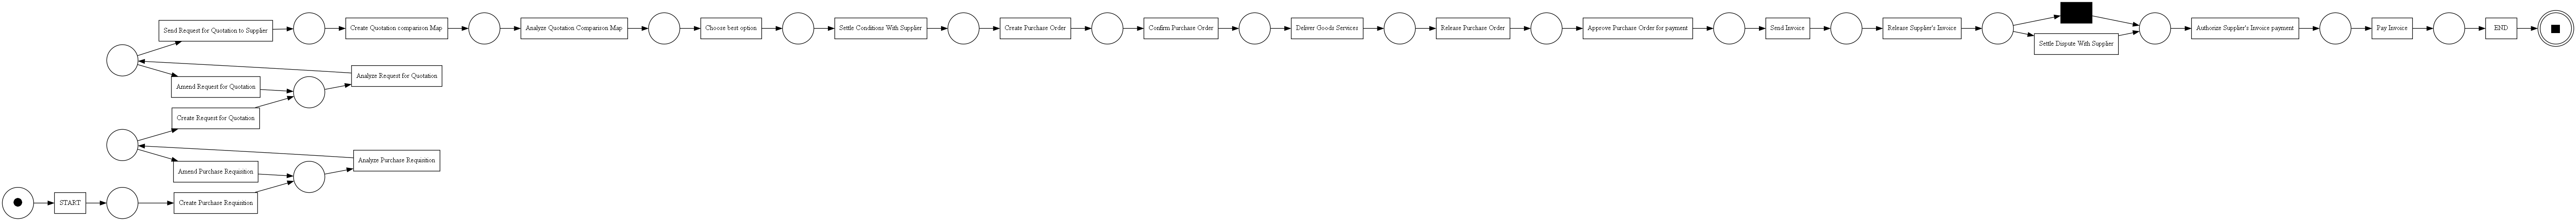

ML Model accuracy:  0.87
Validation Fitness:  0.77
Validation Precision:  0.99
Validation Harmonic Mean (FP):  0.87
Validation Simplicity:  0.92



------ Iteration 1 ------


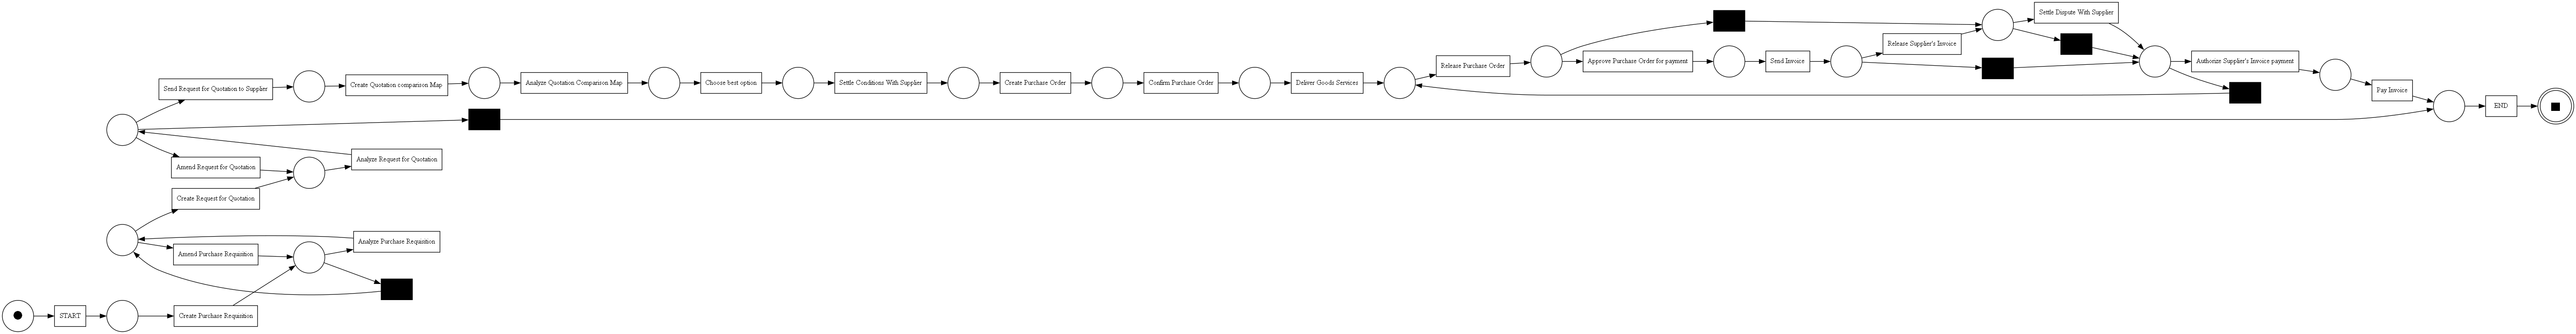

ML Model accuracy:  0.56
Validation Fitness:  0.97
Validation Precision:  0.81
Validation Harmonic Mean (FP):  0.88
Validation Simplicity:  0.78



------ Iteration 2 ------


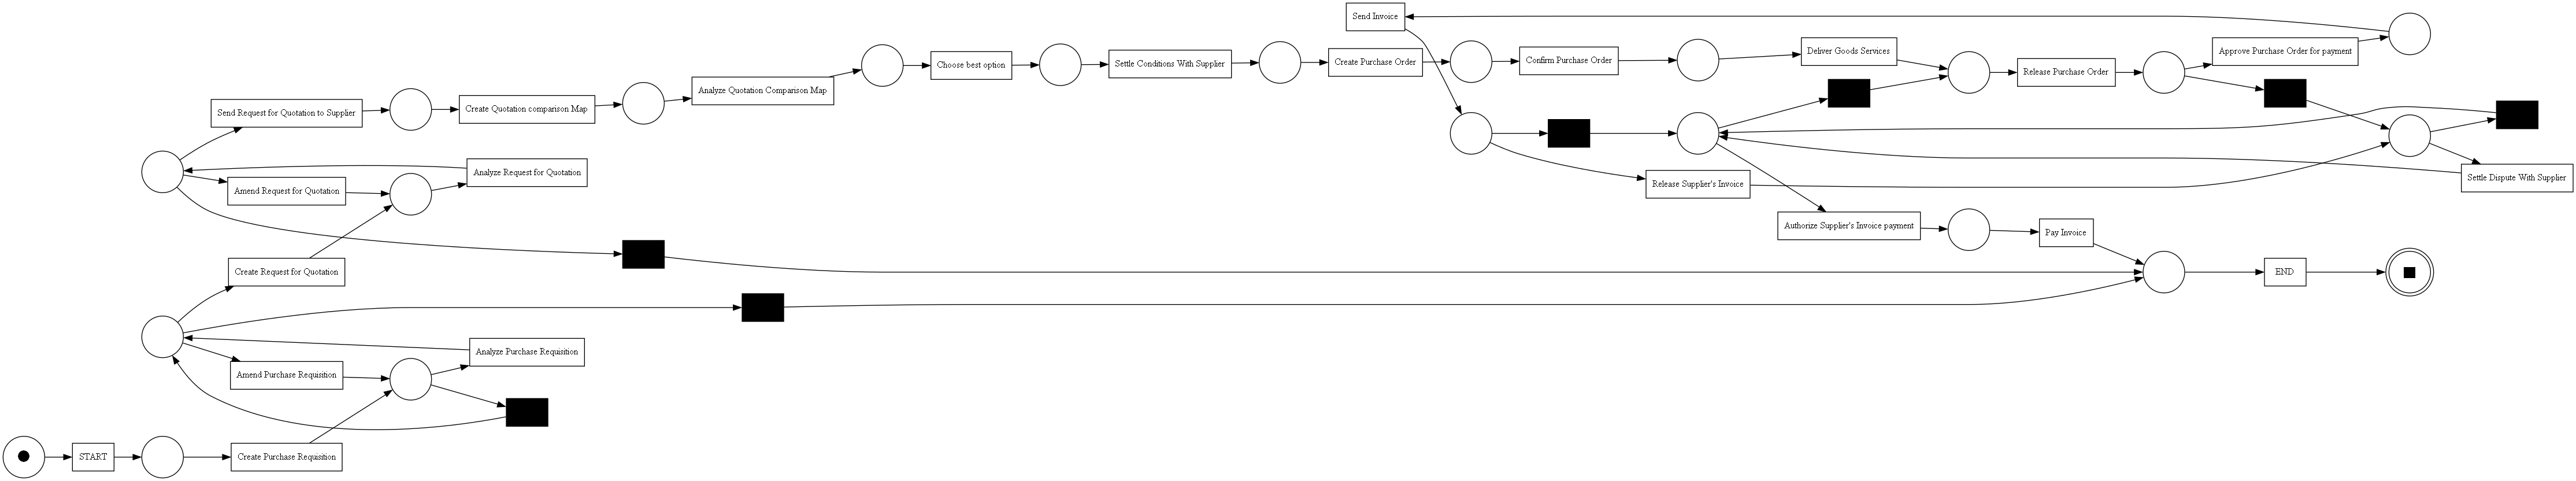

ML Model accuracy:  0.55
Validation Fitness:  1.0
Validation Precision:  0.79
Validation Harmonic Mean (FP):  0.88
Validation Simplicity:  0.76





In [4]:
# COMPLETE APPROACH

n_exp = 1
n_it = len(os.listdir(f'data/{case_study}/exp_{n_exp}')) - 2

with open(f'data/{case_study}/exp_{n_exp}/history.json', 'rb') as file:
    history = json.load(file)

for i in range(n_it):
    print(f'------ Iteration {i} ------')
    net, im, fm = pm4py.read_pnml(f'data/{case_study}/exp_{n_exp}/it_{i}/diagram_{i}.pnml')
    pm4py.view_petri_net(net, im, fm)
    print('ML Model accuracy: ', round(history['validation_accuracy'][i], 2))
    print('Validation Fitness: ', round(history['validation_fitness'][i], 2))
    print('Validation Precision: ', round(history['validation_precision'][i], 2))
    print('Validation Harmonic Mean (FP): ', round(history['validation_harmonic_mean_fit_prec'][i], 2))
    print('Validation Simplicity: ', round(history['validation_simplicity'][i], 2))
    print('\n'*2)

idx_best_1 = history['validation_harmonic_mean_fit_prec'][1:].index(max(history['validation_harmonic_mean_fit_prec'][1:])) + 1

[GREEDY METHOD]

------ Iteration 0 ------


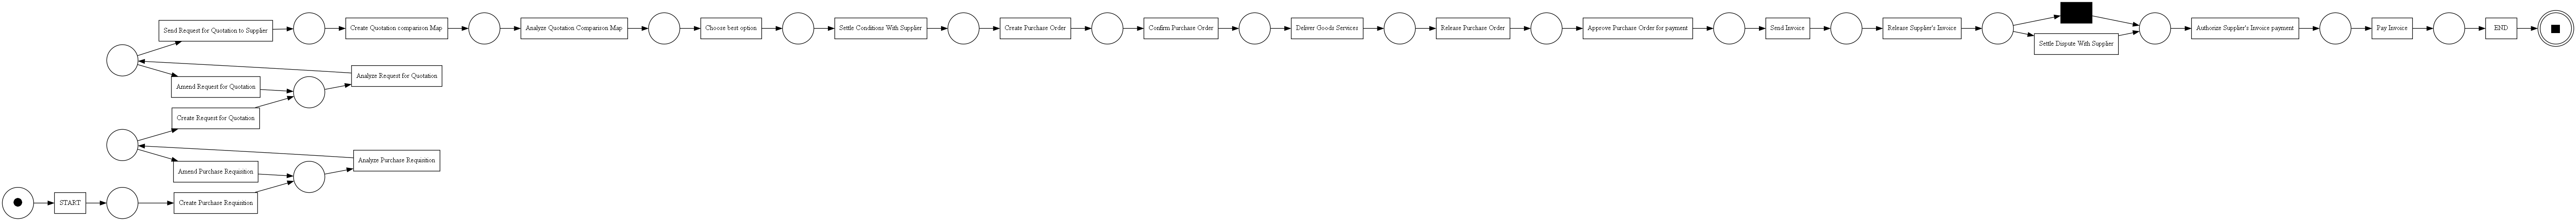

ML Model accuracy:  0.87
Validation Fitness:  0.77
Validation Precision:  0.99
Validation Harmonic Mean (FP):  0.87
Validation Simplicity:  0.92



------ Iteration 1 ------


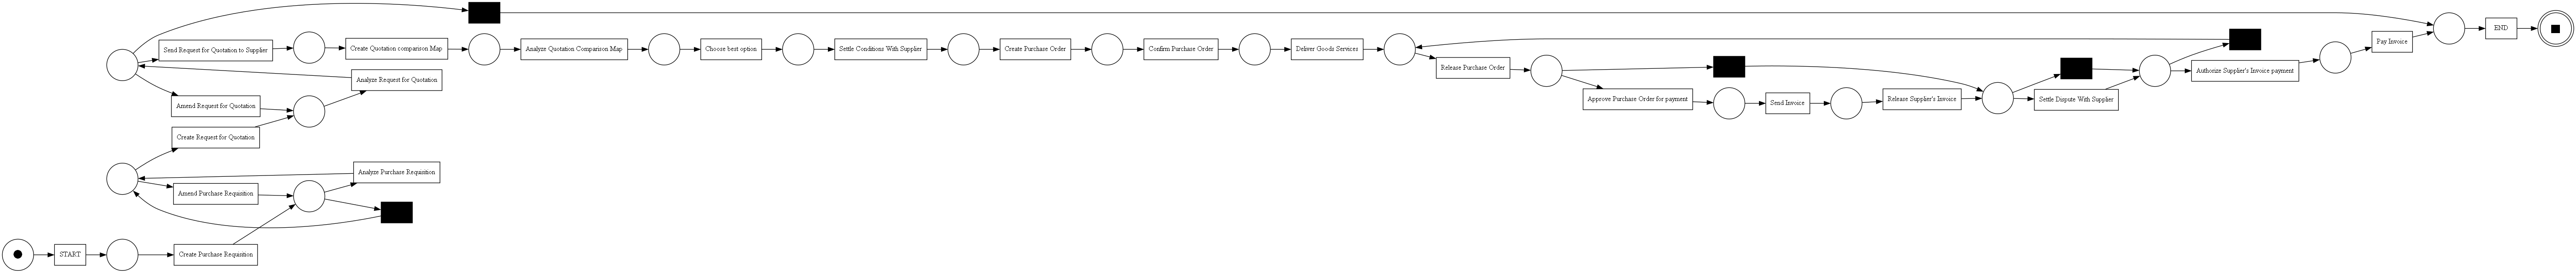

ML Model accuracy:  0.58
Validation Fitness:  0.97
Validation Precision:  0.84
Validation Harmonic Mean (FP):  0.9
Validation Simplicity:  0.81



------ Iteration 2 ------


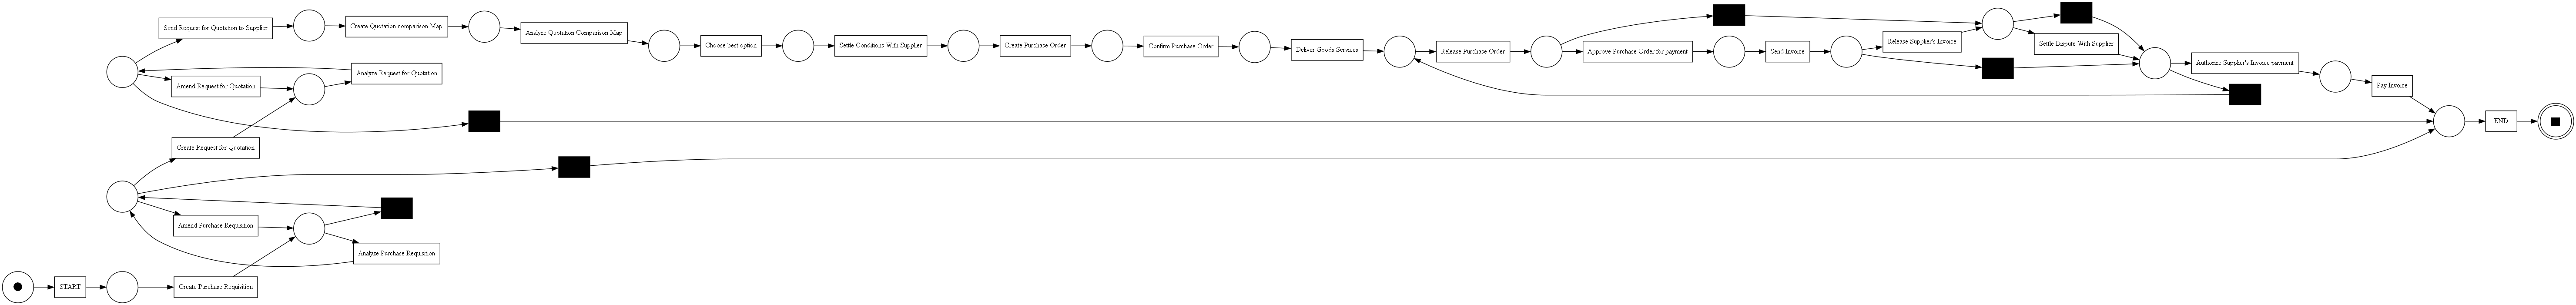

ML Model accuracy:  0.53
Validation Fitness:  1.0
Validation Precision:  0.79
Validation Harmonic Mean (FP):  0.88
Validation Simplicity:  0.76





In [5]:
# GREEDY APPROACH

print('[GREEDY METHOD]\n')
n_exp = 2
n_it = len(os.listdir(f'data/{case_study}/exp_{n_exp}')) - 2

with open(f'data/{case_study}/exp_{n_exp}/history.json', 'rb') as file:
    history = json.load(file)

for i in range(n_it):
    print(f'------ Iteration {i} ------')
    net, im, fm = pm4py.read_pnml(f'data/{case_study}/exp_{n_exp}/it_{i}/diagram_{i}.pnml')
    pm4py.view_petri_net(net, im, fm)
    print('ML Model accuracy: ', round(history['validation_accuracy'][i], 2))
    print('Validation Fitness: ', round(history['validation_fitness'][i], 2))
    print('Validation Precision: ', round(history['validation_precision'][i], 2))
    print('Validation Harmonic Mean (FP): ', round(history['validation_harmonic_mean_fit_prec'][i], 2))
    print('Validation Simplicity: ', round(history['validation_simplicity'][i], 2))
    print('\n'*2)

idx_best_2 = history['validation_harmonic_mean_fit_prec'][1:].index(max(history['validation_harmonic_mean_fit_prec'][1:])) + 1

In [6]:
# TEST RESULTS

print('TEST RESULTS\n')
real_test = xes_importer.apply(f'data/{case_study}/logTest.xes')

c:\Users\vinci\OneDrive\Documents\MLProcessModelRepair\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TEST RESULTS



parsing log, completed traces :: 100%|██████████| 123/123 [00:00<00:00, 1689.51it/s]



------ Initial model ------


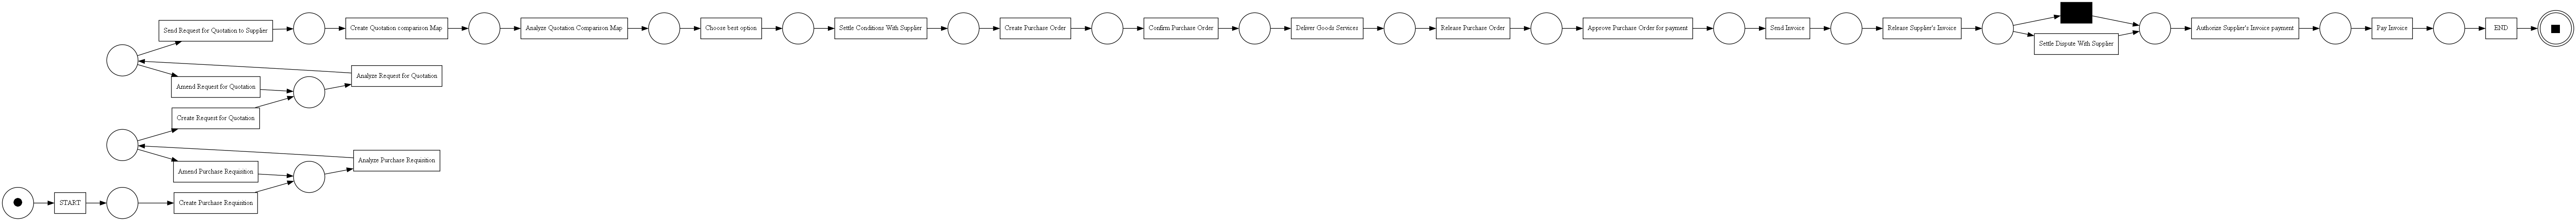

aligning log, completed variants :: 100%|██████████| 28/28 [00:00<00:00, 82.54it/s]
computing precision with alignments, completed variants :: 100%|██████████| 224/224 [00:00<00:00, 401.69it/s]


Starting Fitness:  0.64
Starting Precision:  0.99
Starting Harmonic Mean (FP):  0.77
Starting Simplicity:  0.92


In [7]:
# starting model
print('\n------ Initial model ------')
net_0, im_0, fm_0 = pm4py.read_pnml(f'data/{case_study}/exp_1/it_0/diagram_0.pnml')
pm4py.view_petri_net(net_0, im_0, fm_0)
fitness_0 = fitness_evaluator.apply(real_test, net_0, im_0, fm_0)
fit_0 = fitness_0['averageFitness']
prec_0 = precision_evaluator.apply(real_test, net_0, im_0, fm_0)
simpl_0 = simplicity_evaluator.apply(net_0)
print('\nStarting Fitness: ', round(fit_0, 2))
print('Starting Precision: ', round(prec_0, 2))
print('Starting Harmonic Mean (FP): ', round(2*fit_0*prec_0/(fit_0+prec_0), 2))
print('Starting Simplicity: ', round(simpl_0, 2))



------ [Greedy] Best model ------


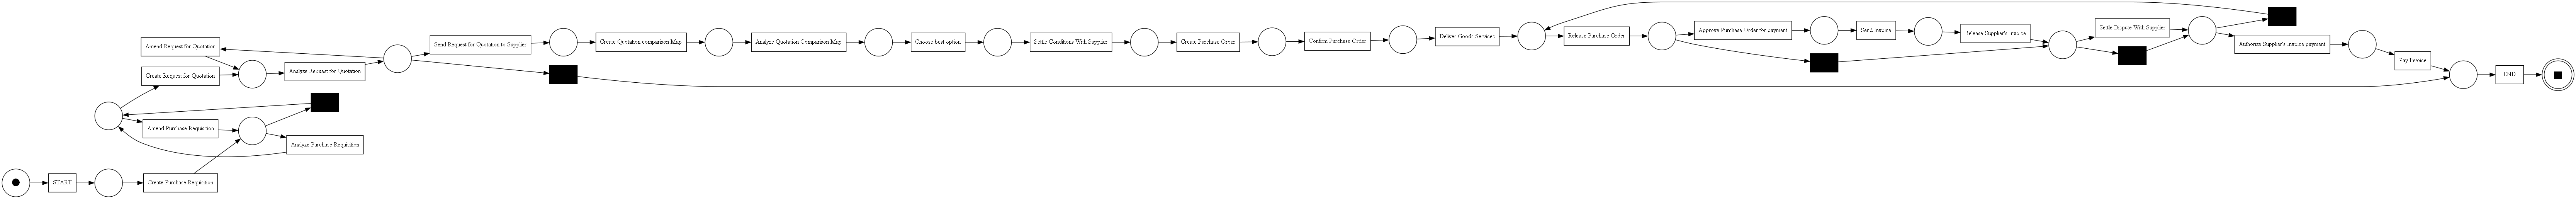

aligning log, completed variants :: 100%|██████████| 28/28 [00:00<00:00, 102.58it/s]
computing precision with alignments, completed variants :: 100%|██████████| 224/224 [00:00<00:00, 234.18it/s]


[Greedy] Test Fitness:  0.95
[Greedy] Test Precision:  0.85
[Greedy] Test Harmonic Mean (FP):  0.89
[Greedy] Test Simplicity:  0.81


In [8]:
# our Greedy framework
print('\n\n------ [Greedy] Best model ------')
h_net, h_im, h_fm = pm4py.read_pnml(f'data/{case_study}/exp_2/it_{idx_best_2}/diagram_{idx_best_2}.pnml')
pm4py.view_petri_net(h_net, h_im, h_fm)
h_fitness = fitness_evaluator.apply(real_test, h_net, h_im, h_fm)
h_fit = h_fitness['averageFitness']
h_prec = precision_evaluator.apply(real_test, h_net, h_im, h_fm)
h_simpl = simplicity_evaluator.apply(h_net)
h_har_p_f = 2*h_fit*h_prec/(h_fit+h_prec)
print('\n[Greedy] Test Fitness: ', round(h_fit, 2))
print('[Greedy] Test Precision: ', round(h_prec, 2))
print('[Greedy] Test Harmonic Mean (FP): ', round(h_har_p_f, 2))
print('[Greedy] Test Simplicity: ', round(h_simpl, 2))



------ [Complete] Best model ------


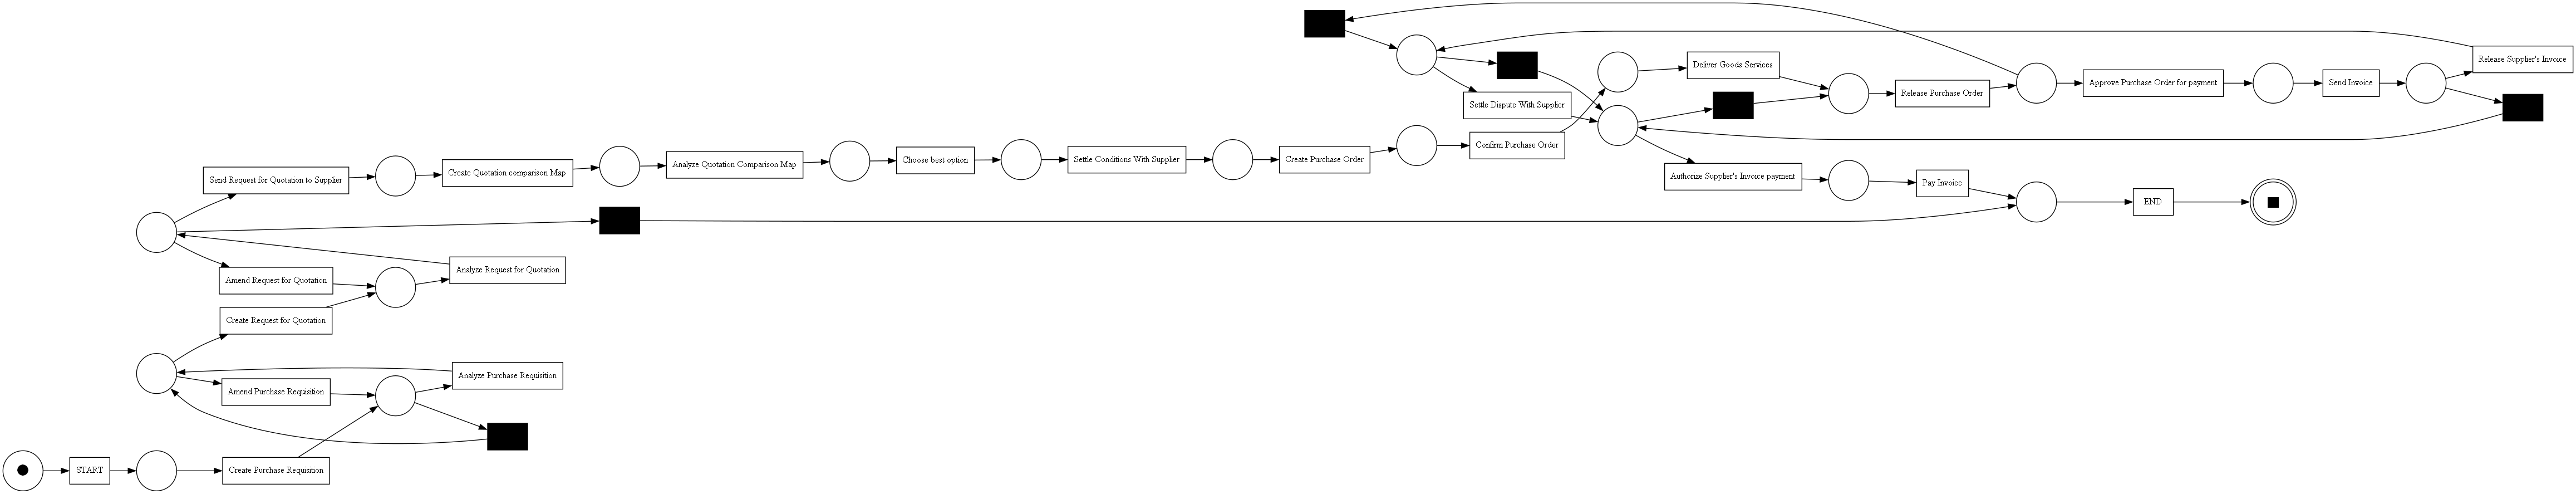

aligning log, completed variants :: 100%|██████████| 28/28 [00:00<00:00, 121.97it/s]
computing precision with alignments, completed variants :: 100%|██████████| 224/224 [00:01<00:00, 204.93it/s]


Test Fitness:  0.95
Test Precision:  0.82
Test Harmonic Mean (FP):  0.88
Test Simplicity:  0.78


In [9]:
# our framework
print('\n\n------ [Complete] Best model ------')
net, im, fm = pm4py.read_pnml(f'data/{case_study}/exp_1/it_{idx_best_1}/diagram_{idx_best_1}.pnml')
pm4py.view_petri_net(net, im, fm)
fitness = fitness_evaluator.apply(real_test, net, im, fm)
fit = fitness['averageFitness']
prec = precision_evaluator.apply(real_test, net, im, fm)
simpl = simplicity_evaluator.apply(net)
har_p_f = 2*fit*prec/(fit+prec)
print('\nTest Fitness: ', round(fit, 2))
print('Test Precision: ', round(prec, 2))
print('Test Harmonic Mean (FP): ', round(har_p_f, 2))
print('Test Simplicity: ', round(simpl, 2))



------ SOTA ------


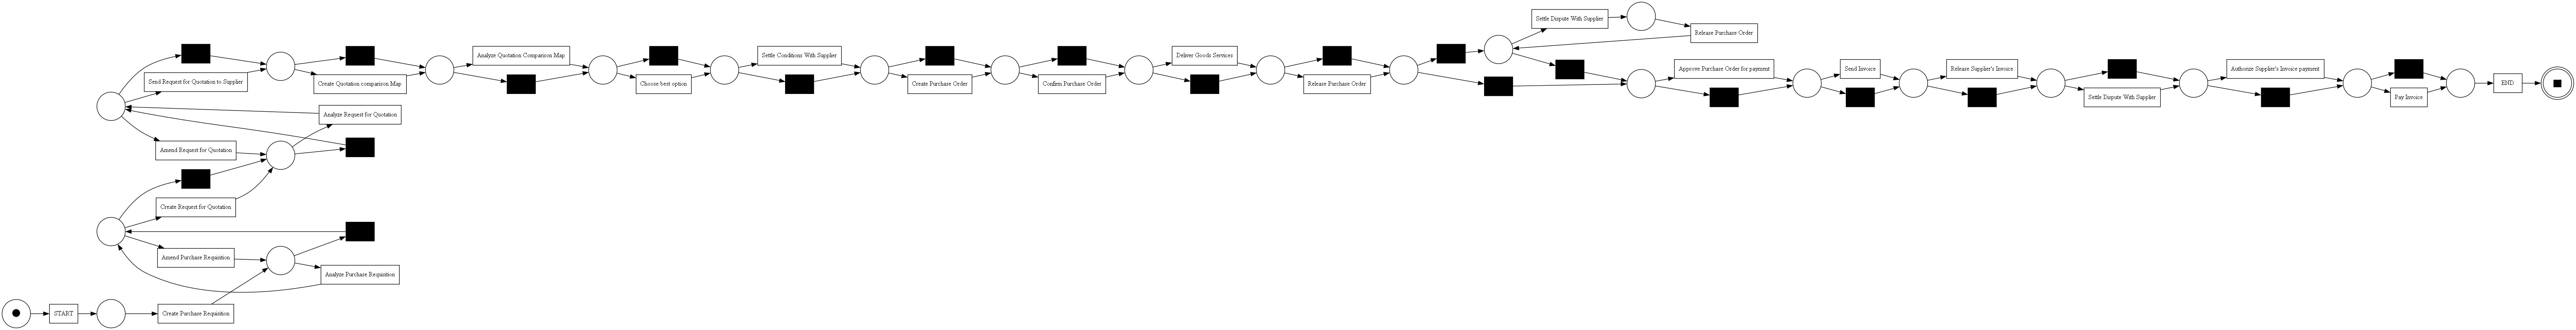

aligning log, completed variants :: 100%|██████████| 28/28 [00:00<00:00, 95.21it/s]
computing precision with alignments, completed variants :: 100%|██████████| 224/224 [00:01<00:00, 160.75it/s]



SOTA Fitness:  1.0
SOTA Precision:  0.13
SOTA Harmonic Mean (FP):  0.23
SOTA Simplicity:  0.63


In [10]:
# State of the art
print('\n\n------ SOTA ------')
sota_net, sota_im, sota_fm = pm4py.read_pnml(f'data/{case_study}/sota/repair.pnml')
pm4py.view_petri_net(sota_net, sota_im, sota_fm)
sota_fit_ = fitness_evaluator.apply(real_test, sota_net, sota_im, sota_fm)
try:
    sota_sound = True
    sota_fit = sota_fit_['averageFitness']
except:
    sota_sound = False
    sota_fit = sota_fit_['average_trace_fitness']
sota_prec = precision_evaluator.apply(real_test, sota_net, sota_im, sota_fm)
sota_sim = simplicity_evaluator.apply(sota_net)
if not sota_sound:
    print('SOTA model is not sound: Fitness and Precision are computed using TOKEN BASED METHOD')
print('\nSOTA Fitness: ', round(sota_fit, 2))
print('SOTA Precision: ', round(sota_prec, 2))
print('SOTA Harmonic Mean (FP): ', round(2*sota_fit*sota_prec/(sota_fit+sota_prec), 2))
print('SOTA Simplicity: ', round(sota_sim, 2))
